<center><h1>Diving into Data Modeling and Validation</h1></center>

## Table of contents

* [Supervised Learning Process](#supervised)
* [Supervised Learning Algorithms](#supervised_algos)
    * [Linear Regression](#linear)
* [Case Study 1: Regression](#case1)

<a id='intro_ml'></a>
## Introduction to Machine Learning

What do you think about Machine Learning? Is it as following?

**The very basic process:**

**Step 01:** Segregate the target and features columns. Split your data into **training** and **test** sets.

<img src="imgs/train-test.png" alt="drawing" width="350">

* **Training Dataset** is the sample of data used to fit the model.
* **Test Dataset** is the sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

The question is what is a good train-test split ratio? There is no unversal rule, some good ratios are 80:20, 70:30.

**Step 02:** Select the appropriate machine learning algorithms according to the nature of your data.

**Step 03:** Select the metrics that are important to you according to the problem.

**Step 04:** Train the algorithm using the **training set**. After training, you'll get your trained model. **Model = Algorithm + Training Data**.

**Step 05:** Make preditions on the **test data** and evaluate your model's performance.

<h4 style="color:red;">Note</h4> This is not the best supervised learning process. This is very basic process. There are better learning process which we'll learn in the future classes.


<a id='supervised_algos'></a>
## Supervised Learning Algorithms

<a id='linear'></a>
### Linear Regression

Linear regression performs the task to predict a dependent variable value **(y)** based on a given independent variable **(x)**. So, this regression technique finds out a linear relationship between **x (input)** and **y (output)**. Hence, the name is Linear Regression.

The mathematical formula of the linear regression can be written as follow:

## <center>$y = \beta_0+\beta_1x+\varepsilon$</center>

We read this as $y$ is modeled as $beta_1$ (b1) times $x$, plus a constant $beta_0$ (b0), plus an error term $\varepsilon$.”

Here:
* $\beta_0$ is the intercept,
* $\beta_1$ is the regression weights or coefficients associated with the predictors $x$
* $\varepsilon$ is the error term (also known as the residual errors)

The figure below illustrates a simple linear regression model, where:


![alter text](https://drive.google.com/uc?id=1chve1ZHWPGjGi9q61pOY_2r0FngUjmuX)

From the scatter plot above, it can be seen that not all the data points fall exactly on the fitted regression line. Some of the points are above the blue line and some are below it; overall, the residual errors ($e$) have approximately mean zero.

The sum of the squares of the residual errors are called the **Residual Sum of Squares or RSS**.
Mathematically, the beta coefficients ($\beta_0$ and $\beta_1$) are determined so that the RSS is as minimal as possible. This method of determining the beta coefficients can be **ordinary least squares (OLS)** or **gradient descent.**


**Linear Regression has 2 of the following types:**
1. Simple Linear Regression
2. Multiple Linear Regression

When you have a single predictor or independent variable, it is **simple linear regression**. The above equation we saw was the equation of simple linear regression.

In **multiple linear regression** you have multiple predictor variables. 
The equation will be:

## <center>$y = \beta_0+\beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \varepsilon$ </center>

Here:
* $\beta_0$ is the intercept,
* $\beta_1, \beta_2, \beta_n$ are the regression weights or coefficients associated with the predictors $x_1, x_2, x_n$

### Scikit-learn Class for Linear Regression

In [1]:
# For mounting your google drive with colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.linear_model import LinearRegression

LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### How to perform Linear Regression using sklearn?

Let's make a toy dataset..

In [13]:
import numpy as np
import pandas as pd

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML DS Session/Day6/Salary_Data.csv") # Paste your colab link of csv file

data.head()

,experience,cgpa,salary
0,1.1,2.62,39343
1,1.3,3.08,46205
2,1.5,2.50,37731
3,2.0,2.90,43525
4,2.2,2.65,39891


In [15]:
data.shape

(30, 3)

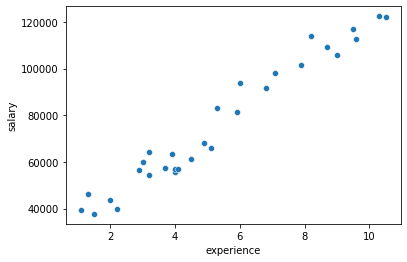

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.scatterplot(x=data['experience'], y=data['salary']);

**Step 01:** Segregate the target and features columns. Split your data into **training** and **test** sets.

Here our feature is only **height** and the target* variable is **weight**.

In [16]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns=='experience']
y = data.loc[:, data.columns=='salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=112)

print("""X_train:{}
y_train:{}
X_test: {}
y_test: {}""".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train:(24, 1)
y_train:(24, 1)
X_test: (6, 1)
y_test: (6, 1)


**Step 02:** Select the appropriate machine learning algorithms according to the nature of your data.

We'll use **Simple Linear Regression**.

**Step 03:** Select the metrics that are important to you according to the problem.

We'll use the **$R^2$** score as our evaluation metric. We'll try to maximize it.

**Step 04:** Train the algorithm using the **training set**. 



In [17]:
slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
slr.coef_

array([[9646.58234292]])

In [8]:
slr.intercept_

array([24346.35037514])

/home/imran/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


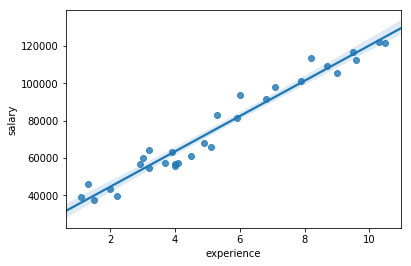

In [ ]:
sns.regplot(x="experience", y="salary", data=data);

**Step 05:** Make preditions on the **test data** and evaluate your model's performance.

In [ ]:
y_pred = slr.predict(X_test)
y_pred

array([[ 55215.41387247],
       [ 61968.02151252],
       [ 45568.83152956],
       [ 36886.90742093],
       [123706.14850718],
       [ 55215.41387247]])

In [ ]:
pd.DataFrame({'true': y_test.values.ravel(), 
             'pred': y_pred.ravel()})

,true,pred
0,54445,55215.413872
1,63218,61968.021513
2,39891,45568.831530
3,46205,36886.907421
4,122391,123706.148507
5,64445,55215.413872


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("The R^2 score is {}".format(r2))

The R^2 score is 0.9526132681833809


<a id='case1'></a>
## Case Study 1: Regression

### Step 1: Collection

In [18]:
import pandas as pd
pd.set_option('display.max_columns', 500)

data_rgr = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML DS Session/Day6/regression_mobile_price.csv") # Use your directory where the csv file stored

### Step 2: Exploration

Let's have glance of the data.

In [19]:
data_rgr.head()

,weight_g,SIM,display_type,display_resolution,display_size_ppi,OS,CPU,memory_card,internal_memory_GB,RAM_GB,primary_camera,secondary_camera,battery,approx_price_EUR
0,260.0,Dual,IPS,7.0,210,Marshmallow,Quad-core,128,16,2.0,13.0,2.0,3400,170
1,169.0,Dual,IPS,5.5,401,Marshmallow,Octa-core,256,32,3.0,13.0,5.0,4080,250
2,166.0,Single,IPS,5.5,267,Lollipop,Octa-core,32,32,3.0,13.0,13.0,4020,230
3,125.0,Dual,IPS,5.0,294,Marshmallow,Quad-core,32,8,1.0,8.0,5.0,2000,110
4,353.8,Single,IPS,8.0,283,Lollipop,Quad-core,256,32,2.0,5.0,2.0,4420,350


In [20]:
data_rgr.shape

(894, 14)

What about the data shape and datatypes?

In [21]:
print("""
No of columns: {}
No of rows: {}
No of categorical columns: {}
No of numerical columns: {}""".format(data_rgr.shape[1], 
                                      data_rgr.shape[0],
                                      len(data_rgr.select_dtypes('O').columns),
                                      len(data_rgr.select_dtypes(['int', 'float']).columns)))


No of columns: 14
No of rows: 894
No of categorical columns: 4
No of numerical columns: 10


In [23]:
data_rgr.describe()

,weight_g,display_resolution,display_size_ppi,memory_card,internal_memory_GB,RAM_GB,primary_camera,secondary_camera,battery,approx_price_EUR
count,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000
mean,191.867673,5.603143,305.961969,121.270694,17.560403,1.883110,10.308110,3.977740,2881.751678,274.439597
std,114.934276,1.480392,93.823252,102.535103,13.680903,0.936407,4.267153,3.009084,1454.876941,529.957657
min,88.200000,3.700000,132.000000,32.000000,1.000000,1.000000,2.000000,1.000000,300.000000,60.000000
25%,140.000000,5.000000,245.000000,32.000000,8.000000,1.000000,8.000000,2.000000,2000.000000,150.000000
50%,154.000000,5.000000,294.000000,64.000000,16.000000,2.000000,8.000000,2.100000,2540.000000,220.000000
75%,176.900000,5.500000,367.000000,256.000000,16.000000,2.000000,13.000000,5.000000,3150.000000,300.000000
max,948.000000,13.300000,807.000000,256.000000,64.000000,6.000000,24.000000,20.000000,9800.000000,11500.000000


Let's have a descriptive statistical tables of the numeric columns.

In [22]:
num_cols = data_rgr.select_dtypes(['int', 'float']).columns
data_rgr[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
weight_g,894.0,191.867673,114.934276,88.2,140.0,154.0,176.9,948.0
display_resolution,894.0,5.603143,1.480392,3.7,5.0,5.0,5.5,13.3
display_size_ppi,894.0,305.961969,93.823252,132.0,245.0,294.0,367.0,807.0
memory_card,894.0,121.270694,102.535103,32.0,32.0,64.0,256.0,256.0
internal_memory_GB,894.0,17.560403,13.680903,1.0,8.0,16.0,16.0,64.0
RAM_GB,894.0,1.883110,0.936407,1.0,1.0,2.0,2.0,6.0
primary_camera,894.0,10.308110,4.267153,2.0,8.0,8.0,13.0,24.0
secondary_camera,894.0,3.977740,3.009084,1.0,2.0,2.1,5.0,20.0
battery,894.0,2881.751678,1454.876941,300.0,2000.0,2540.0,3150.0,9800.0
approx_price_EUR,894.0,274.439597,529.957657,60.0,150.0,220.0,300.0,11500.0


How's the distribution of numerical columns?

<Figure size 432x288 with 0 Axes>

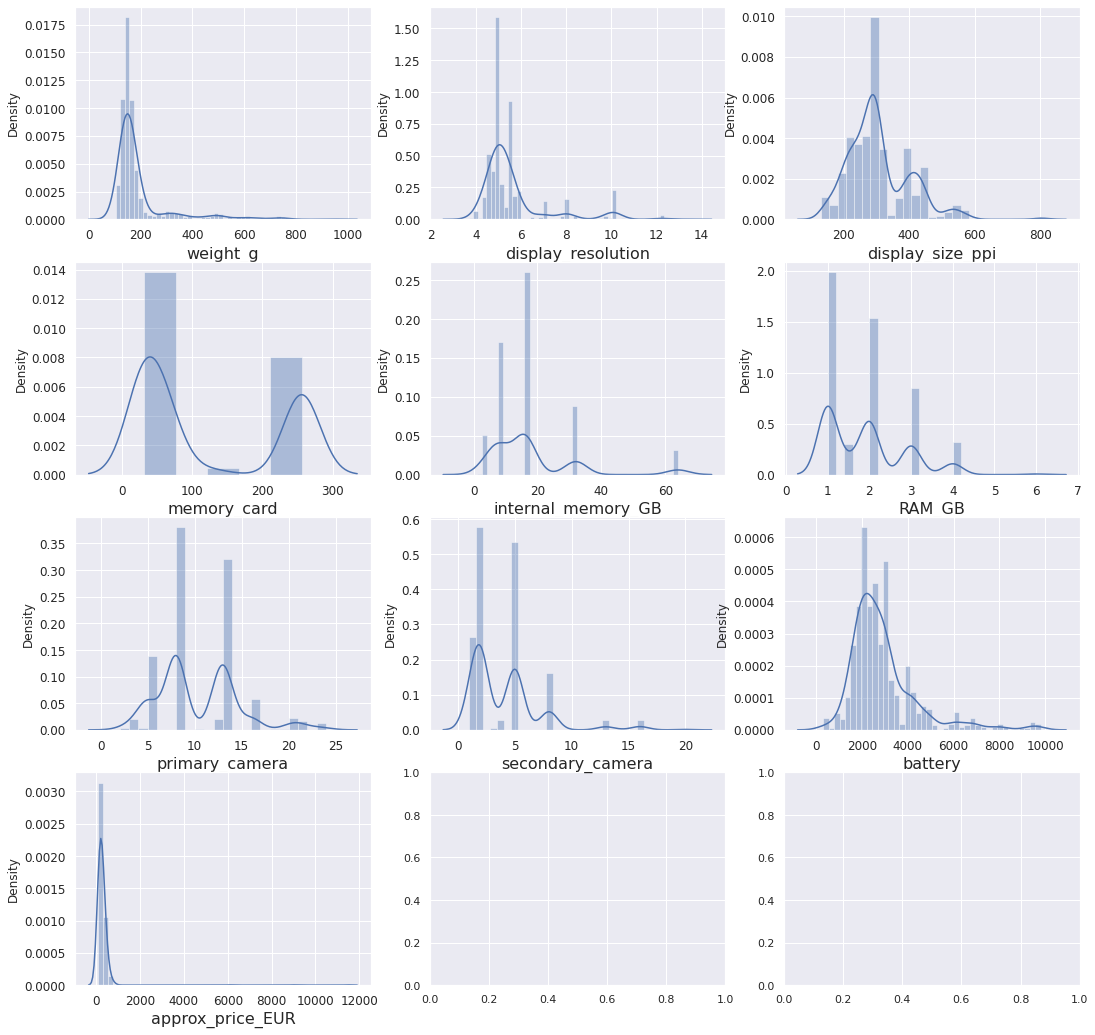

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(18,18))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.distplot(tuple(data[feature]))
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_distribution(data_rgr, num_cols)

Is there any correlation between the numeric columns?

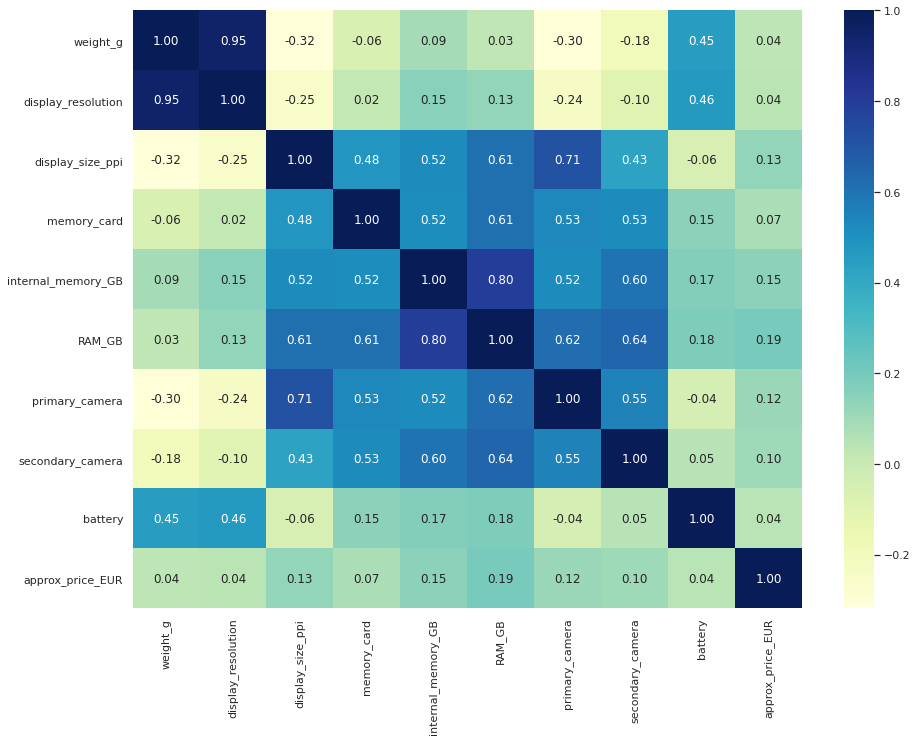

In [27]:
corr = data_rgr[num_cols].corr()
fig, ax = plt.subplots(figsize=(15,11))  
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".2f",cmap="YlGnBu");

What about the categorical columns?

In [28]:
cat_cols = data_rgr.select_dtypes('O').columns

<Figure size 432x288 with 0 Axes>

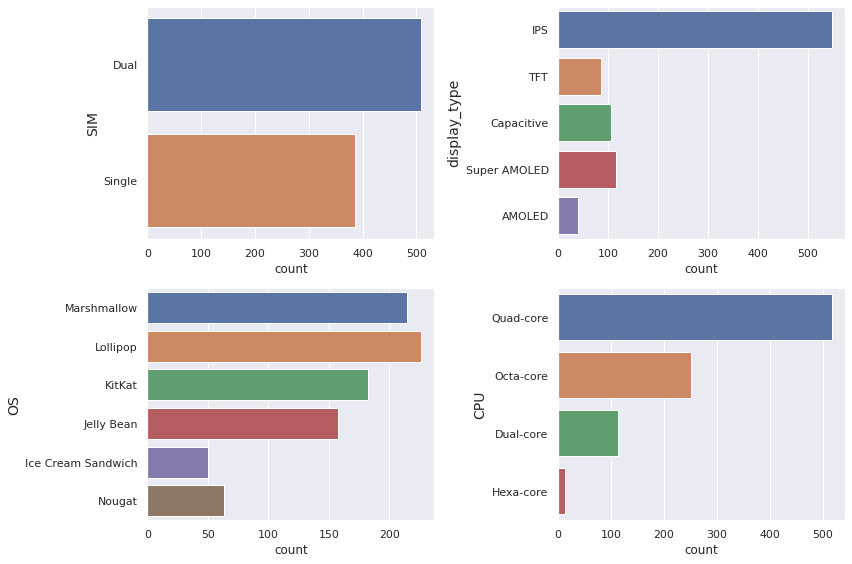

In [29]:
def count_plot(data, features):
    i = 0
    plt.figure()
    col = 2
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(12,8))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        ax = sns.countplot(data=data_rgr,y=feature)
        ax.set_yticklabels(ax.get_yticklabels())
        plt.tight_layout()
        plt.ylabel(feature, fontsize=14)
    plt.show();
    
count_plot(data_rgr, cat_cols)

### Step 3: Preprocessing

Are there any **missing values**?

In [37]:
pd.DataFrame(data_rgr.isnull().sum(), columns=['Missing'])

,Missing
weight_g,0
SIM,0
display_type,0
display_resolution,0
display_size_ppi,0
OS,0
CPU,0
memory_card,0
internal_memory_GB,0
RAM_GB,0


Now, we have to encode the **categorical features**.

**Note**:
* If you use any linear/distance/neural based model, use **OneHotEncoding**.
* If you use tree based model, you can use **LabelEncoder**.

In [38]:
data_rgr_encoded = pd.get_dummies(data_rgr, columns=cat_cols, prefix=cat_cols)

print("Now our dataset has {} columns.".format(data_rgr_encoded.shape[1]))

Now our dataset has 27 columns.


In [32]:
data_rgr_encoded.head()

,weight_g,display_resolution,display_size_ppi,memory_card,internal_memory_GB,RAM_GB,primary_camera,secondary_camera,battery,approx_price_EUR,SIM_Dual,SIM_Single,display_type_AMOLED,display_type_Capacitive,display_type_IPS,display_type_Super AMOLED,display_type_TFT,OS_Ice Cream Sandwich,OS_Jelly Bean,OS_KitKat,OS_Lollipop,OS_Marshmallow,OS_Nougat,CPU_Dual-core,CPU_Hexa-core,CPU_Octa-core,CPU_Quad-core
0,260.0,7.0,210,128,16,2.0,13.0,2.0,3400,170,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,169.0,5.5,401,256,32,3.0,13.0,5.0,4080,250,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,166.0,5.5,267,32,32,3.0,13.0,13.0,4020,230,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,125.0,5.0,294,32,8,1.0,8.0,5.0,2000,110,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,353.8,8.0,283,256,32,2.0,5.0,2.0,4420,350,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


Now, it's time for **data segregation**. We need to separate the feature columns and target colum.

In [39]:
X = data_rgr_encoded.loc[:, data_rgr_encoded.columns!='approx_price_EUR']
y = data_rgr_encoded.loc[:, data_rgr_encoded.columns=='approx_price_EUR']

We have seen from the distribution plot (in Explore section) that most of the features are not well distributed and have variety of ranges. This form of data can confuse the linear/distance based models. That is why we need **Normalize** our data.

In [40]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
scaler.fit(X.values)
X_standered = scaler.transform(X.values)
X_scaled = pd.DataFrame(X_standered, columns=X.columns)

Now we have to make dataset for **traing and validation**.

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=1234)

print("""
X_train has {} data points.
y_train has {} data points.
X_test has {} data points.
y_test has {} data points.
""".format(X_train.shape[0], y_train.shape[0], X_test.shape[0], y_test.shape[0]))


X_train has 715 data points.
y_train has 715 data points.
X_test has 179 data points.
y_test has 179 data points.



### Step 4: Modeling

WOOOHAAA!! Here it is!

Finally, we've reached the modeling part! The easiest one!

We'll use **Linear Regression** algorithm for data modeling. This is the simplest, easiest and most utilized machine learning algorithms in the world!

In [42]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Step 5: Validation

In [43]:
y_pred = lr_model.predict(X_test)

There are wide variety of evaluation metrics for validating regression models such as **Mean absolute error, Mean squared error, Mean squared logarithmic error, Median absolute error regression,	$R^2$ score**. For our problem we'll use the $R^2$ metric. The close the $R^2$ score to 1, the better the model is.

In [44]:
from sklearn.metrics import r2_score

r2 = -r2_score(y_test, y_pred)

print("The R^2 score is {}".format(r2))

The R^2 score is 0.8088217457972067


In [45]:
pd.DataFrame({'true': y_test.values.ravel(), 
             'pred': y_pred.ravel()})

,true,pred
0,340,302.354146
1,250,333.600114
2,340,105.600106
3,270,295.664366
4,220,253.840158
...,...,...
174,290,214.317111
175,250,258.794431
176,570,459.353385
177,250,271.937228


### Step 6: Communication

In [ ]:
print('Intercept of the Regression model:', -lr_model.intercept_[0])
print('\nSlope/Coefficients of the Regression model:')
slope = pd.DataFrame(lr_model.coef_.T, X_train.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
slope

Intercept of the Regression model: 474.4097206995557

Slope/Coefficients of the Regression model:


,Coefficient
RAM_GB,315882.448013
OS_Marshmallow,221088.301320
secondary_camera,13397.600809
primary_camera,9292.206566
display_type_Capacitive,7479.688837
weight_g,3220.873864
display_size_ppi,1101.395437
battery,755.875625
memory_card,-1866.880801
internal_memory_GB,-2697.483044
